In [19]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [3]:
# Define directories for train, test, and validation sets
train_dir = '/kaggle/input/disease/Dataset/train'
test_dir = '/kaggle/input/disease/Dataset/test'
validation_dir = '/kaggle/input/disease/Dataset/val'

# Define parameters for image preprocessing and augmentation
batch_size = 32
target_size = (224, 224)  # Change according to your image size requirements

# Create ImageDataGenerator for train set with augmentation
train_augmentation_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator for test and validation sets (only normalization)
test_validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Flow images from directories with augmentation and preprocessing
train_augmentation_generator = train_augmentation_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'  # Change to 'categorical' if you have multiple classes
)

test_generator = test_validation_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 3257 images belonging to 3 classes.
Found 409 images belonging to 3 classes.
Found 406 images belonging to 3 classes.


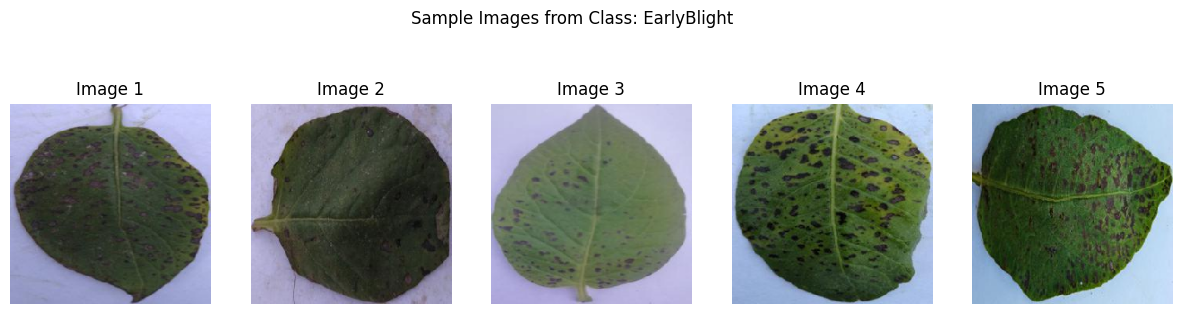

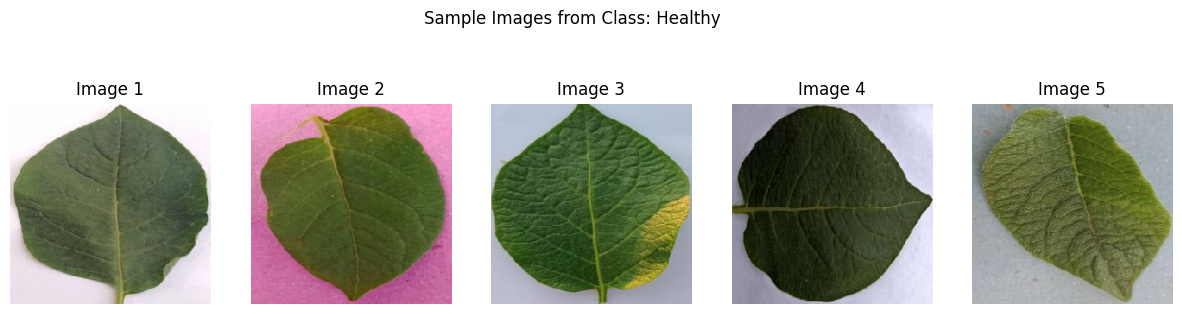

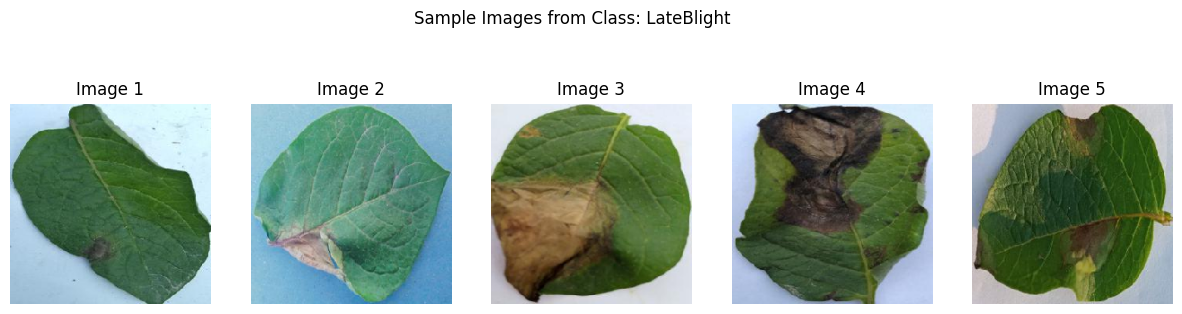

In [5]:
def plot_sample_images(directory, num_images=5):
    class_dirs = [os.path.join(directory, cls) for cls in os.listdir(directory)]
    
    # Plot sample images from each class directory
    for cls_dir in class_dirs:
        class_name = os.path.basename(cls_dir)
        fig, axes = plt.subplots(1, num_images, figsize=(15, 4))
        fig.suptitle(f'Sample Images from Class: {class_name}')
        
        # Load and plot sample images
        image_files = [os.path.join(cls_dir, file) for file in os.listdir(cls_dir)[:num_images]]
        for i, image_file in enumerate(image_files):
            image = load_img(image_file, target_size=(224, 224))  # Load and resize image
            axes[i].imshow(image)
            axes[i].set_title(f'Image {i+1}')
            axes[i].axis('off')
        plt.show()
plot_sample_images(train_dir)

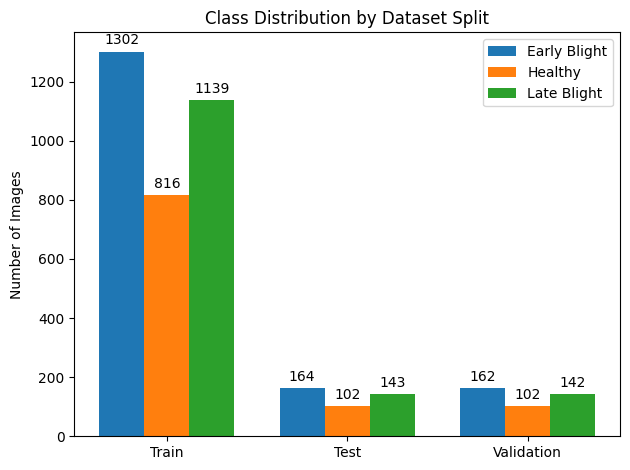

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

def count_images_in_classes(directory):
    num_earlyblight = len(os.listdir(os.path.join(directory, 'EarlyBlight')))
    num_healthy = len(os.listdir(os.path.join(directory, 'Healthy')))
    num_lateblight = len(os.listdir(os.path.join(directory, 'LateBlight')))
    return num_earlyblight, num_healthy, num_lateblight

# Define paths to your directories (replace with your actual paths)
train_dir = '/kaggle/input/disease/Dataset/train'
test_dir = '/kaggle/input/disease/Dataset/test'
validation_dir = '/kaggle/input/disease/Dataset/val'

# Count images in train, test, and validation sets
train_earlyblight, train_healthy, train_lateblight = count_images_in_classes(train_dir)
test_earlyblight, test_healthy, test_lateblight = count_images_in_classes(test_dir)
validation_earlyblight, validation_healthy, validation_lateblight = count_images_in_classes(validation_dir)

# Create bar plot for class distribution
labels = ['Train', 'Test', 'Validation']
earlyblight_counts = [train_earlyblight, test_earlyblight, validation_earlyblight]
healthy_counts = [train_healthy, test_healthy, validation_healthy]
lateblight_counts = [train_lateblight, test_lateblight, validation_lateblight]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, earlyblight_counts, width, label='Early Blight')
rects2 = ax.bar(x, healthy_counts, width, label='Healthy')
rects3 = ax.bar(x + width, lateblight_counts, width, label='Late Blight')

ax.set_ylabel('Number of Images')
ax.set_title('Class Distribution by Dataset Split')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()


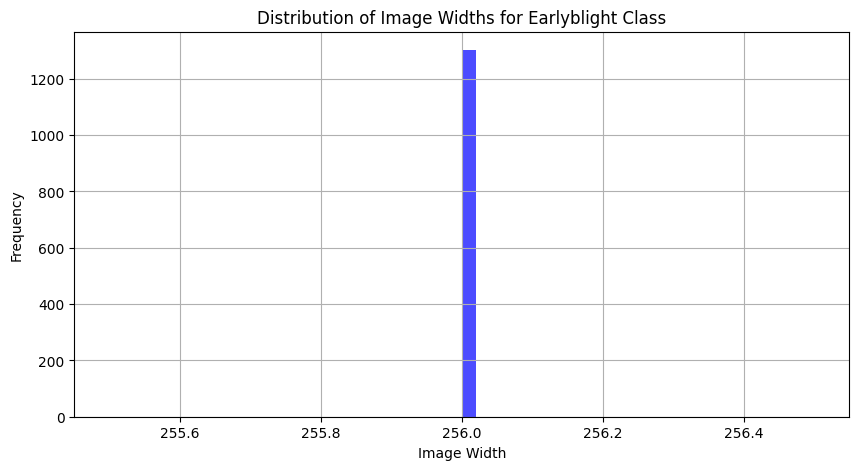

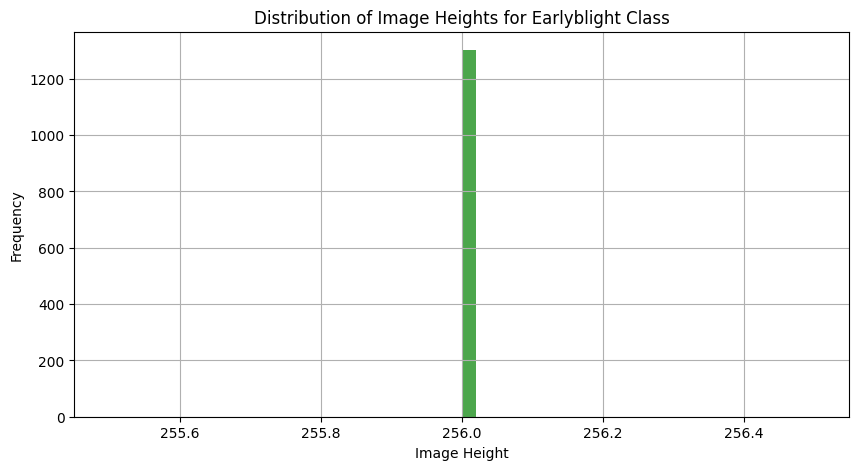

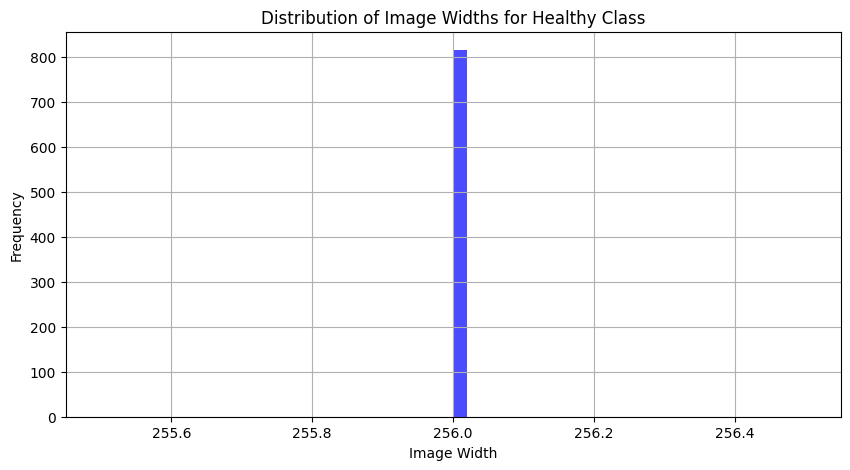

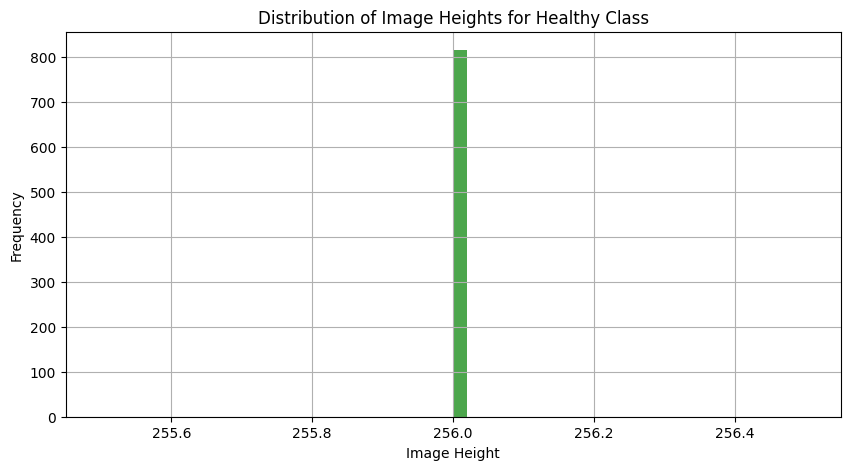

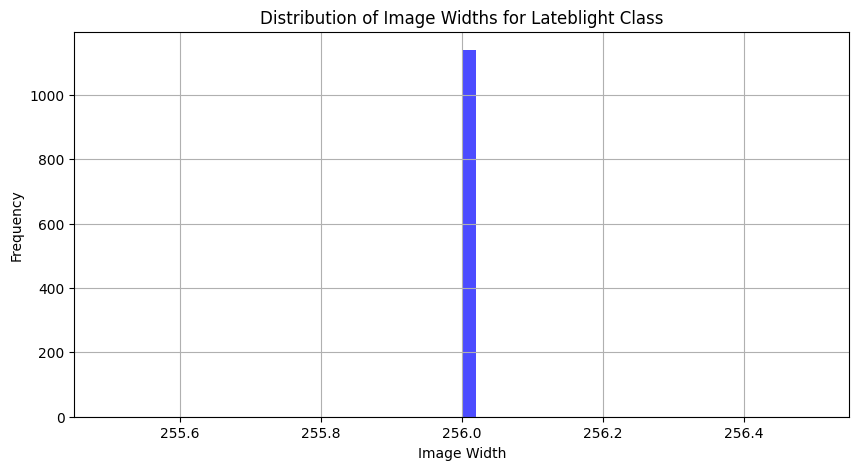

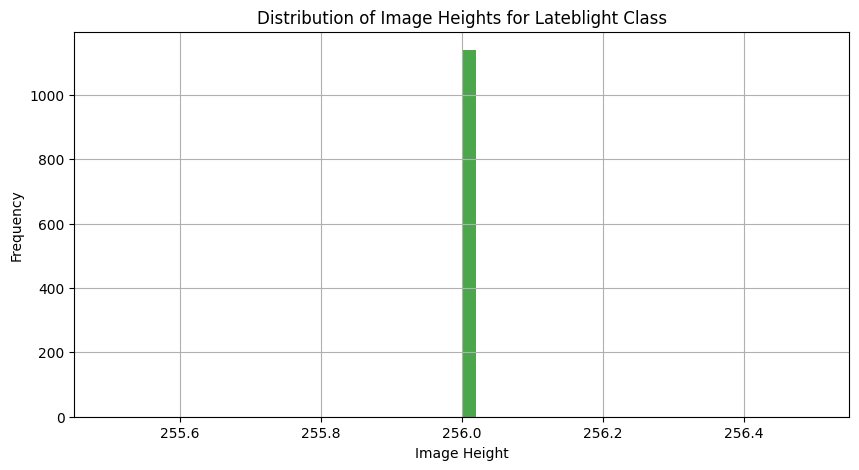

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_image_sizes(directory):
    image_sizes = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust file extensions as needed
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)
                if image is not None:
                    height, width, _ = image.shape
                    image_sizes.append((width, height))
    return image_sizes

# Define paths to your directories (replace with your actual paths)
train_dir = '/kaggle/input/disease/Dataset/train'
test_dir = '/kaggle/input/disease/Dataset/test'
validation_dir = '/kaggle/input/disease/Dataset/val'

# Define classes
classes = ['EarlyBlight', 'Healthy', 'LateBlight']

# Plot histograms for image widths and heights for each class
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    image_sizes = get_image_sizes(class_dir)
    widths, heights = zip(*image_sizes)

    # Plot histogram for width
    plt.figure(figsize=(10, 5))
    plt.hist(widths, bins=50, color='blue', alpha=0.7)
    plt.xlabel('Image Width')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Image Widths for {class_name.capitalize()} Class')
    plt.grid(True)
    plt.show()

    # Plot histogram for height
    plt.figure(figsize=(10, 5))
    plt.hist(heights, bins=50, color='green', alpha=0.7)
    plt.xlabel('Image Height')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Image Heights for {class_name.capitalize()} Class')
    plt.grid(True)
    plt.show()


Found 3257 images belonging to 3 classes.


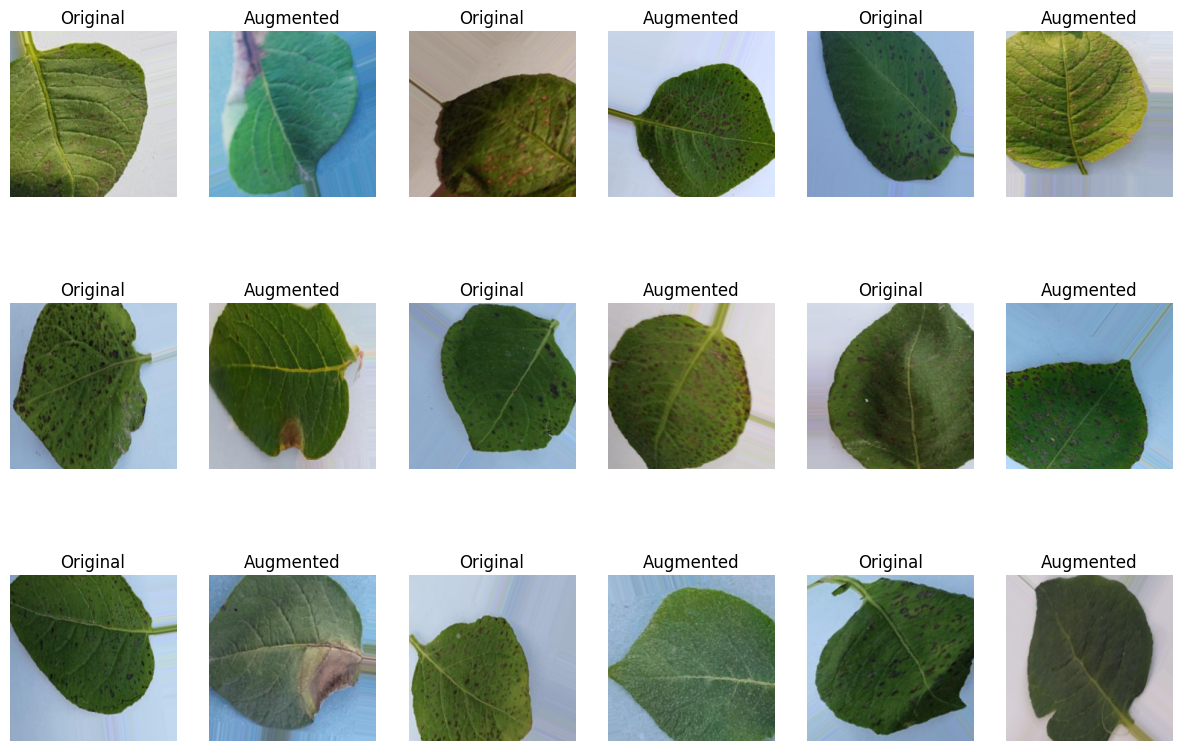

In [8]:
original_images, _ = next(train_augmentation_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=9,
    class_mode='binary',
    shuffle=False
))

augmented_images, _ = next(train_augmentation_generator)

plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 6, 2*i + 1)
    plt.imshow(original_images[i])
    plt.title('Original')
    plt.axis('off')

    plt.subplot(3, 6, 2*i + 2)
    plt.imshow(augmented_images[i])
    plt.title('Augmented')
    plt.axis('off')

plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data = keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/potato/Dataset',
    batch_size = 70,
    image_size =(240,240),

    shuffle = True,
    seed =123,
    subset ='training',
    validation_split=0.15,
    )
validation_data =keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/potato/Dataset',
    batch_size = 70,
    image_size =(240,240),

    shuffle = True,
    seed =123,
    validation_split =0.15,
    subset ='validation',
    )


Found 4072 files belonging to 3 classes.
Using 3462 files for training.
Found 4072 files belonging to 3 classes.
Using 610 files for validation.


In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [12]:
resnet_model = Sequential()
pretrained_model= ResNet50(include_top=False,
                   input_shape=(240,240,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(4, activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
resnet_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [20]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,761,614 (102.09 MB)

 Trainable params: 1,056,260 (4.03 MB)

 Non-trainable params: 23,592,832 (90.00 MB)

 Optimizer params: 2,112,522 (8.06 MB)

In [15]:
history = resnet_model.fit(training_data,
                    steps_per_epoch=len(training_data),
                    epochs=20,
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/20


I0000 00:00:1713362800.363692     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713362800.417925     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8399 - loss: 0.5099

W0000 00:00:1713362819.004205     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713362824.687612     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 755ms/step - accuracy: 0.8413 - loss: 0.5057 - val_accuracy: 0.9459 - val_loss: 0.1997
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20


W0000 00:00:1713362837.513923     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.9744 - loss: 0.0799 - val_accuracy: 0.9541 - val_loss: 0.1497
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 223ms/step - accuracy: 0.9923 - loss: 0.0326 - val_accuracy: 0.9623 - val_loss: 0.1185
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 224ms/step - accuracy: 0.9959 - loss: 0.0160 - val_accuracy: 0.9541 - val_loss: 0.1063
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - accuracy: 0.9972 - loss: 0.0103 - val_accuracy: 0.9574 - val_loss: 0.0977
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy

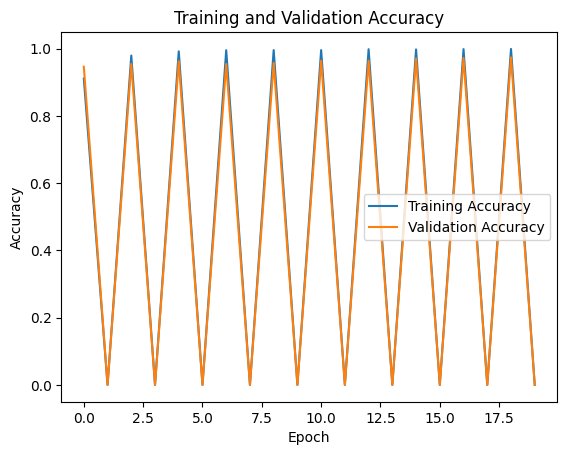

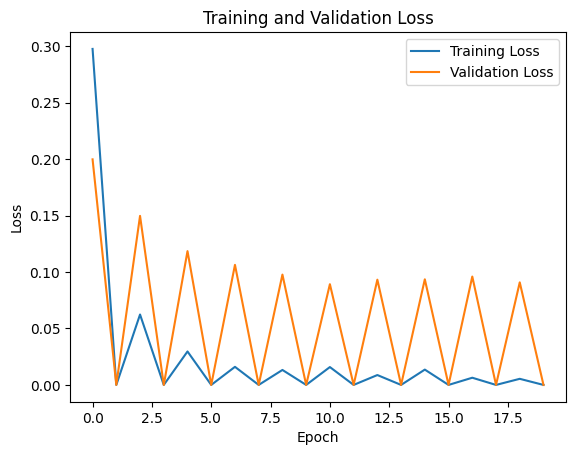

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img = image.load_img('/kaggle/input/potato/Dataset/EarlyBlight/EarlyBlight_1.jpg', target_size=(240, 240))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

# Make predictions
predictions = resnet_model.predict(img_array)  # Assuming 'model' is your trained VGG19 model

# Get the class with the highest probability
predicted_class_index = np.argmax(predictions)

# Define your class labels
class_labels = ['EarlyBlight', 'Healthy', 'LateBlight']  # Update with your actual class labels

# Get the predicted class label
predicted_class = class_labels[predicted_class_index]

print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted class: EarlyBlight


In [18]:
resnet_model.evaluate(validation_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.9809 - loss: 0.0558


[0.09467042237520218, 0.9737704992294312]